# Clustering

Group stocks into 4 risk profiles using K-Means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sys
sys.path.append('../src')

from clustering import find_optimal_clusters, StockClusterer

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

## Load Features

In [2]:
df = pd.read_csv('../Data/Processed/nse_features.csv')
print(f"Loaded {len(df)} stocks")
print(f"Features: {list(df.columns)}")
df.head()

Loaded 57 stocks
Features: ['Stock_code', 'Sector', 'Name', 'volatility_mean', 'volatility_max', 'volatility_7d', 'downside_deviation', 'var_95', 'max_drawdown', 'mean_return', 'std_return', 'return_skew', 'return_kurtosis', 'return_consistency', 'sharpe_ratio', 'rsi_mean', 'bb_width_mean', 'macd_volatility', 'avg_volume', 'volume_volatility', 'amihud_illiquidity', 'trading_frequency', 'momentum_30d', 'momentum_90d', 'trend_strength', 'current_price']


,Stock_code,Sector,Name,volatility_mean,volatility_max,volatility_7d,downside_deviation,var_95,max_drawdown,mean_return,...,bb_width_mean,macd_volatility,avg_volume,volume_volatility,amihud_illiquidity,trading_frequency,momentum_30d,momentum_90d,trend_strength,current_price
0,ABSA,Banking,ABSA Bank Kenya Plc,0.012541,0.028603,0.011135,0.007830,-0.018083,-0.236220,0.000743,...,2.296415,0.176010,457918.016194,1.206789e+06,3.464928e-09,1.000000,0.160772,0.280142,0.166774,18.05
1,BAMB,Construction and Allied,Bamburi Cement Ltd,0.024157,0.072992,0.021978,0.013723,-0.031429,-0.514563,0.000901,...,3.867892,1.282150,233655.667351,4.414206e+06,1.904103e-08,0.985830,-0.176030,-0.126984,-0.094158,55.00
2,BAT,Manufacturing and Allied,British American Tobacco Kenya Plc,0.012213,0.024126,0.010576,0.007299,-0.016280,-0.348232,0.000126,...,1.752410,5.776191,19173.611111,5.648945e+04,1.622817e-09,0.947368,0.059155,0.082014,0.066576,376.00
3,BKG,Banking,BK Group Plc,0.028502,0.054462,0.025778,0.017173,-0.044569,-0.392500,0.001923,...,3.561992,0.576050,86221.114865,5.454811e+05,0.000000e+00,0.599190,-0.012140,-0.013636,-0.028358,32.55
4,BOC,Manufacturing and Allied,BOC Kenya Plc,0.026053,0.052721,0.021544,0.015937,-0.035582,-0.302949,0.001758,...,3.670978,1.450247,10246.268657,7.566827e+04,0.000000e+00,0.406883,-0.002809,0.053412,0.042829,88.75


## Find Optimal K

In [3]:
# Features for clustering
feature_cols = [
    'volatility_mean', 'volatility_max', 'downside_deviation',
    'std_return', 'var_95', 'max_drawdown',
    'sharpe_ratio', 'return_skew', 'return_kurtosis',
    'rsi_mean', 'bb_width_mean', 'macd_volatility',
    'momentum_30d', 'momentum_90d', 'trend_strength',
    'trading_frequency', 'amihud_illiquidity', 'volume_volatility'
]

# Only use features that exist
feature_cols = [col for col in feature_cols if col in df.columns]
print(f"\nUsing {len(feature_cols)} features")

cluster_metrics = find_optimal_clusters(df, feature_cols, max_clusters=8)
print(cluster_metrics)


Using 18 features


c:\Users\PC\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

   n_clusters      inertia  silhouette
0           2  7208.379906    0.637274
1           3  5874.323149    0.643491
2           4  4778.905927    0.602812
3           5  3873.334188    0.490740
4           6  3188.941094    0.512604
5           7  2445.650558    0.528359
6           8  1785.714366    0.447449


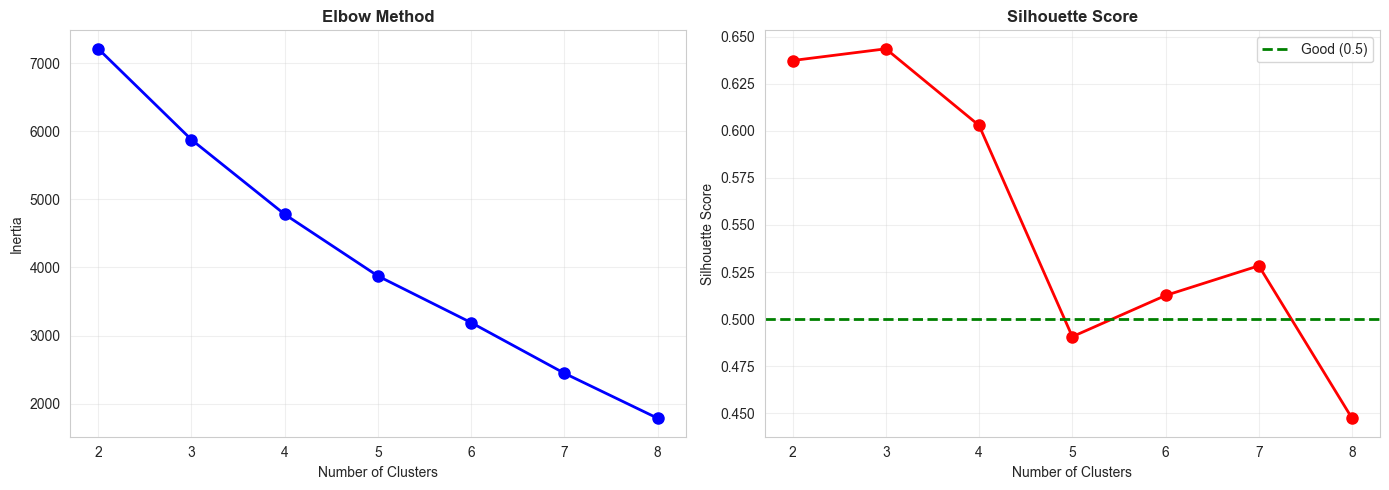


Best K = 3 (highest silhouette)


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax1.plot(cluster_metrics['n_clusters'], cluster_metrics['inertia'], 'bo-', linewidth=2, markersize=8)
ax1.set_title('Elbow Method', fontweight='bold')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

# Silhouette plot
ax2.plot(cluster_metrics['n_clusters'], cluster_metrics['silhouette'], 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.5, color='g', linestyle='--', label='Good (0.5)', linewidth=2)
ax2.set_title('Silhouette Score', fontweight='bold')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

best_k = cluster_metrics.loc[cluster_metrics['silhouette'].idxmax(), 'n_clusters']
print(f"\nBest K = {int(best_k)} (highest silhouette)")

## Train Model

In [5]:
clusterer = StockClusterer(n_clusters=4, random_state=42)
df_clustered = clusterer.fit_predict(df)

print(f"\nCluster Distribution:")
print(df_clustered['Risk_Profile'].value_counts())

Using 12 features for clustering:
std_return, volatility_mean, max_drawdown, sharpe_ratio, return_consistency, downside_deviation, var_95, return_skew, rsi_mean, momentum_30d, trading_frequency, amihud_illiquidity


c:\Users\PC\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0: Low Risk (5 stocks)
Cluster 3: Medium-Low Risk (4 stocks)
Cluster 2: Medium-High Risk (47 stocks)
Cluster 1: High Risk (1 stocks)

✅ Clustering complete!
📊 Silhouette Score: 0.508
🎉 EXCELLENT separation! (≥0.5)

Cluster Distribution:
Risk_Profile
Medium-High Risk    47
Low Risk             5
Medium-Low Risk      4
High Risk            1
Name: count, dtype: int64


## Visualize with PCA

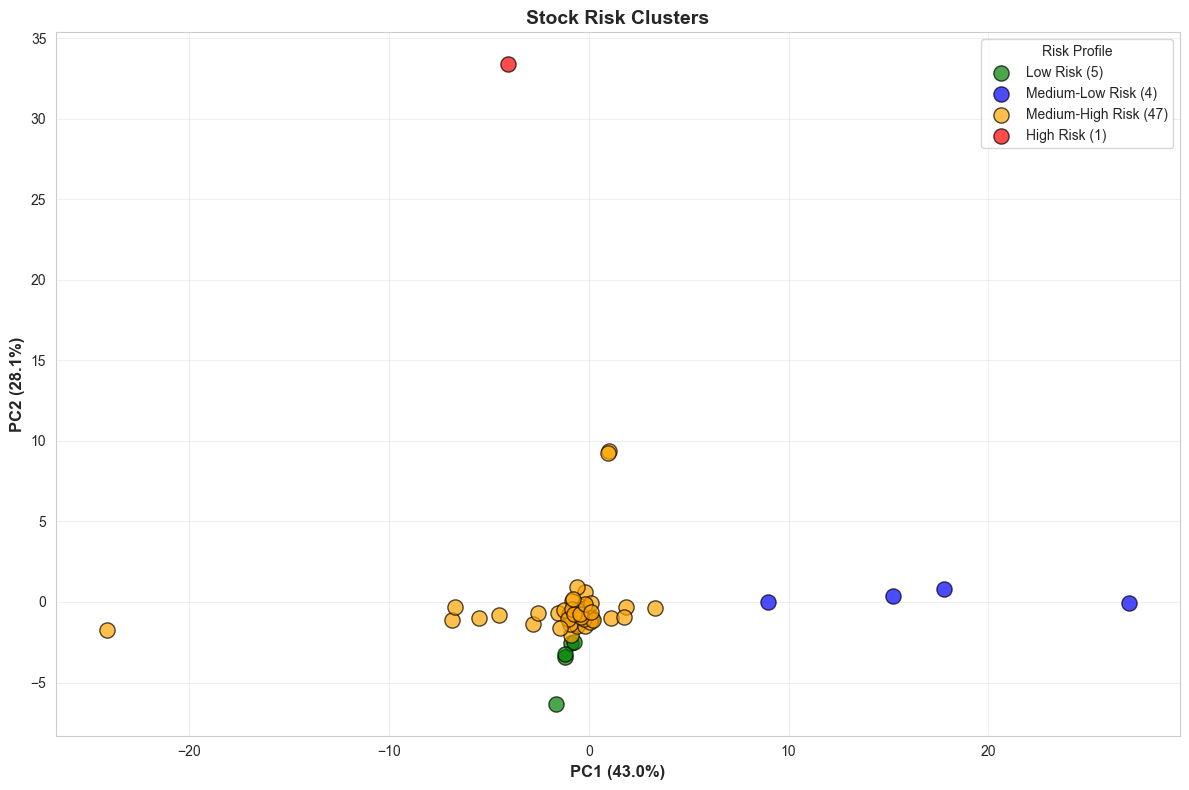

In [6]:
# Prepare data
X = df_clustered[clusterer.feature_columns].fillna(df_clustered[clusterer.feature_columns].median())
X_scaled = clusterer.scaler.transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(12, 8))
colors = ['green', 'blue', 'orange', 'red']
labels = ['Low Risk', 'Medium-Low Risk', 'Medium-High Risk', 'High Risk']

for i, (color, label) in enumerate(zip(colors, labels)):
    mask = df_clustered['Risk_Profile'] == label
    if mask.sum() > 0:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=color, label=f"{label} ({mask.sum()})",
                    alpha=0.7, s=120, edgecolors='black', linewidth=1)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12, fontweight='bold')
plt.title('Stock Risk Clusters', fontsize=14, fontweight='bold')
plt.legend(title='Risk Profile', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Cluster Profiles

In [7]:
summary = clusterer.get_cluster_summary(df_clustered)
print("\nCluster Summary:")
print(summary)


Cluster Summary:
                  Count  Avg Volatility  Sharpe Ratio  Avg Drawdown  \
Risk_Profile                                                          
High Risk             1          0.0046        0.8866       -0.0698   
Low Risk              5          0.0386        0.0064       -0.5618   
Medium-High Risk     47          0.0260        0.0192       -0.4731   
Medium-Low Risk       4          0.0206        0.0136       -0.5350   

                  Trading Freq  Median Volume  
Risk_Profile                                   
High Risk               0.0425     43923.8095  
Low Risk                0.9419     12168.2099  
Medium-High Risk        0.8018     41815.3144  
Medium-Low Risk         0.9980    405719.7015  


## Sample Stocks

In [8]:
for risk in ['Low Risk', 'Medium-Low Risk', 'Medium-High Risk', 'High Risk']:
    subset = df_clustered[df_clustered['Risk_Profile'] == risk]
    if len(subset) > 0:
        print(f"\n{'='*60}")
        print(f"{risk} ({len(subset)} stocks)")
        print('='*60)
        
        cols = ['Stock_code', 'Name', 'Sector', 'volatility_mean', 'sharpe_ratio']
        available_cols = [c for c in cols if c in subset.columns]
        
        sample = subset.nsmallest(min(5, len(subset)), 'volatility_mean')[available_cols]
        print(sample.to_string(index=False))


Low Risk (5 stocks)
Stock_code                          Name                   Sector  volatility_mean  sharpe_ratio
      CABL       East African Cables Ltd  Construction and Allied         0.033784      0.006411
      FTGH Flame Tree Group Holdings Ltd Manufacturing and Allied         0.034978      0.013684
       TCL             Trans-Century Plc               Investment         0.040613     -0.015486
      EVRD      Eveready East Africa Ltd  Commercial and Services         0.041534      0.016092
      SMER             Sameer Africa Plc  Commercial and Services         0.041851      0.011390

Medium-Low Risk (4 stocks)
Stock_code                                     Name                   Sector  volatility_mean  sharpe_ratio
      KEGN Kenya Electricity Generating Company Plc     Energy and Petroleum         0.016458     -0.008299
      EABL               East African Breweries Ltd Manufacturing and Allied         0.019731      0.012368
       IMH                       I & M Holdin

## Save Results

In [9]:
# Save clustered data
df_clustered.to_csv('../Data/Processed/nse_clustered.csv', index=False)
print("✅ Saved clustered data")

# Save model
clusterer.save_model('../models/stock_clusterer.pkl')
print("✅ Saved model")

✅ Saved clustered data
✅ Model saved to ../models/stock_clusterer.pkl
✅ Saved model
